<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 1</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm A*</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [57]:
import random
import matplotlib.pyplot as plt
from queue import PriorityQueue
import time


In [58]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890!@#$%^&*()_-+='

In [59]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [60]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [-100, 100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        points[alphabet[i]] = [x,y]
    return points


In [61]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(11)
graph, points = all

In [62]:
# for point, coords in points.items():
#    x, y, z = coords
#    print(f"{point}: ({x}, {y}, {z})")
for point, coords in points.items():
   x, y = coords
   print(f"{point}: ({x}, {y})")

A: (-14, -84)
B: (-60, -27)
C: (-17, -83)
D: (2, -68)
E: (77, -43)
F: (-81, -77)
G: (67, 1)
H: (-44, -77)
I: (87, -80)
J: (-44, 54)
K: (16, 92)


In [63]:
# def plot3D(points):
#     labels = points.keys()
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     for point, label in zip(points.values(), labels):
#         ax.scatter(point[0], point[2], point[1], label=label)
#         ax.text(point[0], point[2], point[1], label)


#     ax.set_xlabel('X')
#     ax.set_ylabel('Z')
#     ax.set_zlabel('Y')

#     plt.show()

# plot3D(points)

In [64]:
points

{'A': [-14, -84],
 'B': [-60, -27],
 'C': [-17, -83],
 'D': [2, -68],
 'E': [77, -43],
 'F': [-81, -77],
 'G': [67, 1],
 'H': [-44, -77],
 'I': [87, -80],
 'J': [-44, 54],
 'K': [16, 92]}

Rzutowanie na płaszczyznę XZ

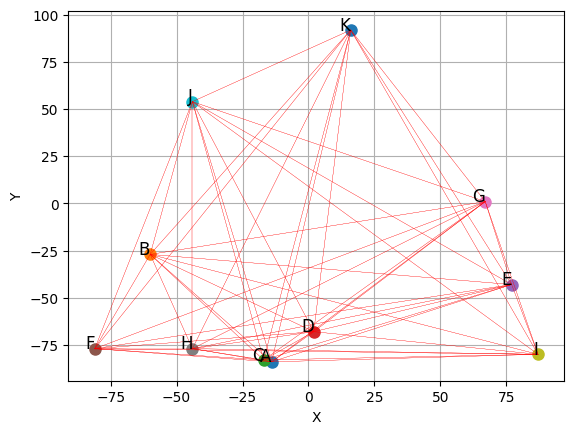

In [65]:
# def draw_graph(points):
#     fig, ax = plt.subplots()
#     for point, coords in points.items():
#         ax.plot(coords[0], coords[2], 'o', markersize=8, label=point)
#         ax.text(coords[0], coords[2], point, fontsize=12, ha='right')
#     for u in points:
#         for v in points:
#             if u != v:
#                 ax.plot([points[u][0], points[v][0]], [points[u][2], points[v][2]], '-', color='green', linewidth=0.5)
#     ax.set_xlim(min(p[0] for p in points.values()) - 10, max(p[0] for p in points.values()) + 10)
#     ax.set_ylim(min(p[2] for p in points.values()) - 10, max(p[2] for p in points.values()) + 10)

#     ax.set_xlabel('X')
#     ax.set_ylabel('Z')
#     plt.grid(True)
#     plt.show()


def draw_graph(points):
    fig, ax = plt.subplots()
    for point, coords in points.items():
        ax.plot(coords[0], coords[1], 'o', markersize=8, label=point)
        ax.text(coords[0], coords[1], point, fontsize=12, ha='right')
    for u in points:
        for v in points:
            if u != v:
                ax.plot([points[u][0], points[v][0]], [points[u][1], points[v][1]], '-', color='red', linewidth=0.15)
    ax.set_xlim(min(p[0] for p in points.values()) - 10, max(p[0] for p in points.values()) + 10)
    ax.set_ylim(min(p[1] for p in points.values()) - 10, max(p[1] for p in points.values()) + 10)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.grid(True)
    plt.show()

draw_graph(points)

In [66]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2)**(1/2)

In [67]:
def distances(points):
    distance_dict = {}
    matrix = []
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)


In [68]:
# def get_path_length(path, dist_dict):
#     d = 0
#     for i in range(len(path)-1):
#         node1 = path[i]
#         node2 = path[i+1]
#         d += dist_dict[(node1,node2)][0]
#     return d

def get_path_length(path, ):
    dist_dict = {}
    dist_dict = distances_dict
    
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

In [69]:
distances_dict

{('A', 'B'): 73.24616030891995,
 ('A', 'C'): 3.1622776601683795,
 ('A', 'D'): 22.627416997969522,
 ('A', 'E'): 99.80981915623332,
 ('A', 'F'): 67.36467917239716,
 ('A', 'G'): 117.41379816699569,
 ('A', 'H'): 30.805843601498726,
 ('A', 'I'): 101.07917688624102,
 ('A', 'J'): 141.22322755127783,
 ('A', 'K'): 178.53851125177448,
 ('B', 'A'): 73.24616030891995,
 ('B', 'C'): 70.60453243241541,
 ('B', 'D'): 74.33034373659252,
 ('B', 'E'): 137.93114224133723,
 ('B', 'F'): 54.230987451824994,
 ('B', 'G'): 130.04999038831184,
 ('B', 'H'): 52.49761899362675,
 ('B', 'I'): 156.26259949200897,
 ('B', 'J'): 82.56512580987206,
 ('B', 'K'): 141.19844191774922,
 ('C', 'A'): 3.1622776601683795,
 ('C', 'B'): 70.60453243241541,
 ('C', 'D'): 24.20743687382041,
 ('C', 'E'): 102.15674231297707,
 ('C', 'F'): 64.28063471995279,
 ('C', 'G'): 118.79393923933998,
 ('C', 'H'): 27.65863337187866,
 ('C', 'I'): 104.04326023342406,
 ('C', 'J'): 139.6352391053204,
 ('C', 'K'): 178.08424972467387,
 ('D', 'A'): 22.6274169

In [70]:
# print(distances_dict[min(distances_dict, key=distances_dict.get)])
# del distances_dict[('D', 'B')]
# del distances_dict[('B', 'D')]
# print(distances_dict[min(distances_dict, key=distances_dict.get)])


In [71]:
def return_edges_dict_by_path(path, distances_dict):
    # Stwórz pusty słownik na wynikowe krawędzie
    result_edges = {}

    # Stwórz zbiór punktów startowych i końcowych do usunięcia na podstawie ścieżki
    start_points_to_remove = set(path[:-1])  # Zbiór punktów startowych do usunięcia
    end_points_to_remove = set(path[1:])    # Zbiór punktów końcowych do usunięcia

    # Przeglądaj wszystkie krawędzie w słowniku odległości
    for edge, distance in distances_dict.items():
        # Sprawdź, czy krawędź nie zaczyna się ani nie kończy na zakazanym punkcie
        if not (edge[0] in start_points_to_remove or edge[1] in end_points_to_remove):
            result_edges[edge] = distance

    return result_edges


In [72]:
# d = return_edges_dict_by_path(['A', 'C', 'K', 'D', 'F'], distances_dict)
# d

A* algorytm

In [73]:
def expand_path(current_path, points, queue, current_distance, dist_dict, admissible=True):
    last_node = current_path[-1]
    for point in points:
        if point in current_path:
            continue
        distance = dist_dict[(last_node, point)]
        distance += current_distance
        distances_dict = return_edges_dict_by_path(current_path, dist_dict)
        
        if admissible:
            value = distances_dict[min(distances_dict, key=distances_dict.get)]
        else:
            value = sum(distances_dict.values()) / len(distances_dict)
        heuristic_value = (len(points) - len(current_path) + 1) * value
        approx = distance + heuristic_value

        path = current_path.copy()
        path.append(point) 
        queue.put([approx, [path, [distance, heuristic_value], approx, distances_dict]])


^ działa na oewno dobrze

In [74]:
def A_star(starter_node, distances_dict, admissible = True):
    pq = PriorityQueue()
    expand_path([starter_node],points,pq,0,distances_dict)

    while not pq.empty():
        expanded_path = pq.get()[1]
        current_path = expanded_path[0]
        current_distance = expanded_path[1][0]
        dist_dict = expanded_path[3]

        if len(current_path) == len(points): 
            last_node = current_path[-1]
            current_distance += dist_dict[(last_node, starter_node)]

            next_element = pq.get()[1]
            approx_of_next = next_element[2]

            if current_distance <= approx_of_next:
                current_path.append(starter_node)
                return [current_path, get_path_length(current_path)]
            else:
                pq.put([approx_of_next,  next_element])
                print(dist_dict)
                pq.put([current_distance, [current_path, [current_distance, 0], current_distance, dist_dict]])

        expand_path(current_path, points, pq, current_distance, dist_dict, admissible)

    

In [75]:
def get_shortest_path(paths, starter_node):
    minPathLength = get_path_length(paths[0])
    shortestPath = paths[0]
    for path in paths:
      path.append(starter_node)
      if get_path_length(path) < minPathLength:
          minPathLength = get_path_length(path)
          shortestPath = path
    return (shortestPath, round(minPathLength,3))

In [76]:

def DFS(graph, starterNode, path=[]):
    path = path + [starterNode]
    if len(path) == len(graph): 
        return [path]
    paths = []
    for neighbour in graph[starterNode]:
        if neighbour not in path:
            newpaths = DFS(graph, neighbour, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [77]:
start_time = time.time()
paths = DFS(graph, 'A')
dfs_shortest_path = get_shortest_path(paths, 'A')
elapsed_time_dfs = time.time() - start_time

In [78]:
start_time = time.time()
a_star_admissaile_shortest_path = A_star('A', distances_dict)
elapsed_time_A_star_adm = time.time() - start_time
print(a_star_admissaile_shortest_path[0])

['A', 'D', 'I', 'E', 'G', 'K', 'J', 'B', 'F', 'H', 'C', 'A']


In [79]:
start_time = time.time()
a_star_inadmissable_shortest_path = A_star('A', distances_dict, False)
elapsed_time_A_star_inadm = time.time() - start_time

In [80]:
def draw_graph(points, paths, times):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 
    colors = ['red', 'green', 'purple']
    titles = ['DFS', 'A* admissible', 'A* inadmissible']


    for i, ax in enumerate(axes):
        path, path_length = paths[i]
        time = times[i]  


        for point, coords in points.items():
            ax.plot(coords[0], coords[1], 'o', markersize=8, label=point)
            ax.text(coords[0], coords[1], point, fontsize=12, ha='right')
        
    
        for u in points:
            for v in points:
                if u != v:
                    ax.plot([points[u][0], points[v][0]], [points[u][1], points[v][1]], '-', color='grey', linewidth=0.5)

        path_coords = [(points[p][0], points[p][1]) for p in path]
        path_xs, path_ys = zip(*path_coords)
        ax.plot(path_xs, path_ys, '-', color=colors[i], linewidth=4)

        ax.set_xlim(min(p[0] for p in points.values()) - 10, max(p[0] for p in points.values()) + 10)
        ax.set_ylim(min(p[1] for p in points.values()) - 10, max(p[1] for p in points.values()) + 10)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f"{titles[i]} - Length: {path_length:.3f}, Time: {time:.4f} sec")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [81]:
# print(a_star_admissaile_shortest_path)

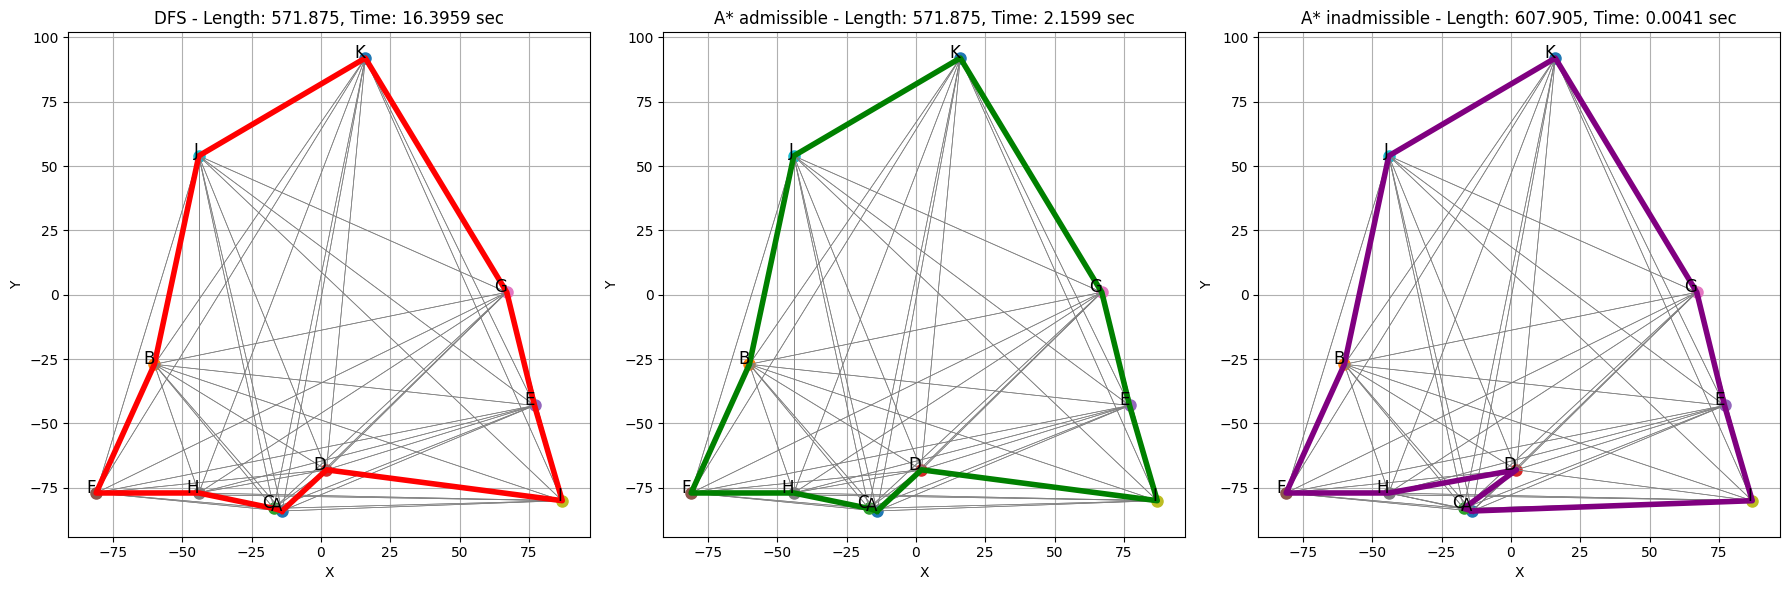

In [82]:
draw_graph(points, [dfs_shortest_path, a_star_admissaile_shortest_path, a_star_inadmissable_shortest_path], [elapsed_time_dfs, elapsed_time_A_star_adm, elapsed_time_A_star_inadm])